In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import numpy as np
import statsmodels.formula.api as sm

In [3]:
import statsmodels.graphics.api as smg
%matplotlib inline
import pandas as pd
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
root_dir = os.getcwd()

In [5]:
root_dir

'/Users/yiyichen/Documents/migrationsKB/MGKB/notebooks'

In [6]:
df = pd.read_csv("../data/correlation_data/working_dataset.csv")

In [7]:

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
countries = ["AT", "DE", "GB", "ES", "PL", "FR", "SE", "HU", "CH", "NL", "IT"]


In [18]:
df[["asyl_per100k", "migrant_stock_per100k" , "total_unemployment", "real_gdp_r", "country_code", "year"]].dropna().year.value_counts()


2014    11
2015    11
2016    11
2017    11
2018    11
2019    11
Name: year, dtype: int64

# Correlation Analysis

In [53]:
lt_unemployment = pd.read_csv("../data/eurostat_stats/lt_unemployment.csv")

In [55]:
lt_unemployment=lt_unemployment[lt_unemployment["UNIT"]=="Percentage of population in the labour force"] 

In [57]:
lt_unemployment = lt_unemployment[lt_unemployment["SEX"]=="Total"]

In [61]:
lt_unemployment.rename(columns = {"TIME":"year", "GEO":"country_code", "Value":"lt_unemployment"}, inplace=True)

In [63]:
lt_unemployment_ = lt_unemployment[["year", "country_code", "lt_unemployment"]]

In [84]:
lt_unemployment_["country_code"].replace({"UK":"GB"}, inplace=True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [139]:
lt_unemployment_.to_csv("../data/uk_eu/lt_unemployment.csv",index=False)

In [133]:
df_merge = pd.merge(df, lt_unemployment_, on=["year", "country_code"], how="left")

In [134]:
len(df_merge), len(df)

(88, 88)

In [196]:
income = pd.read_csv("../data/eurostat_stats/income.csv")

In [197]:
income.rename(columns = {"TIME":"year", "GEO":"country_code", "Value":"income"}, inplace=True)

In [198]:
income_ = income[["year", "country_code", "income"]]

In [199]:
income_uk = pd.read_csv("../data/eurostat_stats/UK/income_uk.csv")

In [200]:
income_uk = income_uk[income_uk["Title"].isin([str(x) for x in years])]

In [201]:
income_uk["year"] = [int(x) for x in income_uk["Title"]]
income_uk["income"] = income_uk["UK Real net national disposable income per capita CVM SA"]

In [113]:
# income_uk["income_euro"] = [round(int(x)*1.19) for x in income_uk["income"]]

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_55382/1423066290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_uk["income_euro"] = [round(int(x)*1.19) for x in income_uk["income"]]


In [202]:
income_uk["country_code"] =["GB" for _ in range(len(income_uk))]

In [118]:
income_uk = income_uk[["year", "country_code", "income_euro"]]

In [119]:
income_uk.rename(columns={"income_euro":"income"}, inplace=True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [207]:
income_uk = income_uk[["year", "country_code", "income"]]

In [208]:
df_income = pd.concat([income_uk, income_])

In [209]:
df_income.to_csv("../data/uk_eu/income.csv", index=False)

In [206]:
df_merge.year

0     2013
1     2013
2     2013
3     2013
4     2013
      ... 
83    2020
84    2020
85    2020
86    2020
87    2020
Name: year, Length: 88, dtype: int64

In [135]:
df_ = pd.merge(df_merge, df_income, on=["year", "country_code"], how="left")

In [137]:
df_[df_["country_code"]=="GB"]["total_unemployment"]

5     7.5
16    6.1
27    5.3
38    4.8
49    4.3
60    4.0
71    3.8
82    4.9
Name: total_unemployment, dtype: float64

## youth unemployment rate

In [140]:
yt_unemployment_file = "../data/eurostat_stats/youth_unemployment.csv"
yt_unemployment = pd.read_csv(yt_unemployment_file)
yt_unemployment = yt_unemployment[yt_unemployment["sex"] == "T"]  #

In [142]:
yt_unemployment.columns

Index(['age,unit,sex,geo\time', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'age', 'country', 'sex'],
      dtype='object')

In [145]:
yt_unemployment=yt_unemployment[[ '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020','country']]

In [148]:
yt_unemployment = yt_unemployment[yt_unemployment["country"].isin(countries)]

In [153]:
yt_unemployment_uk_file = "../data/eurostat_stats/UK/youth_unemployment_UK.csv"
yt_unemployment_uk = pd.read_csv(yt_unemployment_uk_file)

In [155]:
yt_unemployment_uk = yt_unemployment_uk[yt_unemployment_uk["Title"].isin([str(x) for x in years])]

In [ ]:
yt_unemployment_uk["year"] = [int(x) for x in yt_unemployment_uk["Title"]]
yt_unemployment_uk["youth_unemployment"] = yt_unemployment_uk["LFS: Unemployment rate: UK: All: Aged 16-24: %: SA"]

In [162]:
yt_unemployment_uk = yt_unemployment_uk[["year", "youth_unemployment"]]

In [ ]:
yt_unemployment_uk["country_code"] = ["GB" for _ in range(len(yt_unemployment_uk))]

In [ ]:
from collections import defaultdict
ytdict = defaultdict(dict)
count=0
for _, item in yt_unemployment.T.to_dict().items():
    country=item["country"]
    print(country)
    for k, v in item.items():
        if k!="country":
            if int(k) in years:
                ytdict[count]={
                "year": int(k), 
                "country_code":country, 
                "youth_unemployment":v
                }
                count+=1
            

In [173]:
yt_df = pd.DataFrame.from_dict(ytdict, orient="index")

In [178]:
yt_df_ = pd.concat([yt_df, yt_unemployment_uk])

In [180]:
yt_df_ = yt_df_[["year", "country_code", "youth_unemployment"]]

In [184]:
yt_df_.to_csv("../data/uk_eu/youth_unemployment.csv", index=False)

In [181]:
df1 = pd.merge(df_, yt_df_, on=["year", "country_code"], how="left")

In [189]:
df1.to_csv("../data/correlation_data/working_dataset.csv", index=False)

In [193]:
total_unemployment = df1[["year", "country_code", "total_unemployment"]]

In [195]:
total_unemployment.to_csv("../data/uk_eu/total_unemployment.csv", index=False)

In [213]:
gdpr = df1[["year", "country_code", "real_gdp_r"]]

In [216]:
gdpr.to_csv("../data/uk_eu/real_gdpr.csv", index=False)

In [212]:
df1.columns

Index(['Unnamed: 0', 'year', 'country_code', 'valuenormal', 'valueoffensive',
       'valuehate', 'valueNegative', 'valueNeutral', 'valuePositive',
       'country', 'total_unemployment', 'real_gdp_r', 'immigration_flow',
       'asylum_applications', 'total_population', 'EU_migrant_stock',
       'NonEU_migrant_stock', 'share_offensive', 'share_negative',
       'share_positive', 'asyl_per100k', 'immigrationflow_per100k',
       'total_migrant_stock', 'migrant_stock_per100k', 'nonEU_stock_per100k',
       'iso3n', 'share_normal', 'share_hate', 'share_neutral',
       'lt_unemployment', 'income', 'youth_unemployment'],
      dtype='object')

# analysis

In [14]:
df = pd.read_csv("../data/correlation_data/working_dataset.csv")

In [15]:
df

,Unnamed: 0,year,country_code,valuenormal,valueoffensive,valuehate,valueNegative,valueNeutral,valuePositive,country,...,total_migrant_stock,migrant_stock_per100k,nonEU_stock_per100k,iso3n,share_normal,share_hate,share_neutral,lt_unemployment,income,youth_unemployment
0,0,2013,AT,313,4,22,22,186,131,Austria,...,NaN,NaN,NaN,40,0.923304,0.064897,0.548673,1.3,21200.0,10.3
1,1,2013,CH,581,5,21,45,405,157,Switzerland,...,NaN,NaN,NaN,756,0.957166,0.034596,0.667216,1.5,NaN,8.7
2,2,2013,DE,1628,18,76,166,1134,422,Germany,...,NaN,NaN,NaN,276,0.945412,0.044135,0.658537,2.4,19800.0,7.8
3,3,2013,ES,1135,15,77,139,737,351,Spain,...,NaN,NaN,NaN,724,0.925020,0.062755,0.600652,13.0,13200.0,55.5
4,4,2013,FR,1676,8,71,127,1046,582,France,...,NaN,NaN,NaN,250,0.954986,0.040456,0.596011,4.4,18500.0,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,2020,HU,339,4,25,45,212,111,Hungary,...,199594.0,NaN,NaN,348,0.921196,0.067935,0.576087,1.1,NaN,12.5
84,84,2020,IT,2908,145,324,950,1677,750,Italy,...,5039099.0,NaN,NaN,380,0.861119,0.095943,0.496595,4.8,NaN,29.4
85,85,2020,NL,2333,23,132,456,1432,600,Netherlands,...,1146362.0,NaN,NaN,528,0.937701,0.053055,0.575563,0.9,NaN,9.1
86,86,2020,PL,746,15,34,119,520,156,Poland,...,357640.0,NaN,NaN,616,0.938365,0.042767,0.654088,0.6,NaN,10.8


In [16]:
df["asyl_per100k_sq"]=df["asyl_per100k"].pow(2)

In [17]:
df["asyl_x_unemployment"] = df["asyl_per100k"]*df["total_unemployment"]

## 1. pairwise correlation between all variables

In [18]:
# pwcorr share_negative share_positive share_offensive total_unemployment real_gdp_r immigrationflow_per100k asyl_per100k migrant_stock_per100k, star(0.05)
cols = ["share_negative", "share_positive", "share_offensive", "share_hate", "total_unemployment", "lt_unemployment", "youth_unemployment", "income",
        "real_gdp_r", "immigrationflow_per100k", "asyl_per100k", "migrant_stock_per100k"]

In [19]:
df_pcc = df[cols]

In [20]:
from scipy.stats import pearsonr

In [9]:
rho= df_pcc.corr()
pval = df_pcc.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.1,0.05,0.01] if x<=t]))

NameError: name 'df_pcc' is not defined

In [26]:
mask = np.zeros_like(rho, dtype=bool)
mask[np.triu_indices_from(mask)] = True
rho[mask] = np.nan
(rho
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_65235/1888464096.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (rho


,share_negative,share_positive,share_offensive,share_hate,total_unemployment,lt_unemployment,youth_unemployment,income,real_gdp_r,immigrationflow_per100k,asyl_per100k,migrant_stock_per100k
share_negative,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
share_positive,-0.75,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
share_offensive,0.75,-0.67,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
share_hate,0.77,-0.52,0.68,nan,nan,nan,nan,nan,nan,nan,nan,nan
total_unemployment,-0.10,0.19,-0.03,-0.05,nan,nan,nan,nan,nan,nan,nan,nan
lt_unemployment,-0.17,0.23,-0.05,-0.06,0.95,nan,nan,nan,nan,nan,nan,nan
youth_unemployment,-0.02,0.11,0.05,0.04,0.94,0.92,nan,nan,nan,nan,nan,nan
income,0.30,-0.11,0.10,0.26,-0.27,-0.32,-0.28,nan,nan,nan,nan,nan
real_gdp_r,-0.42,0.14,-0.27,-0.20,-0.11,-0.06,-0.14,-0.40,nan,nan,nan,nan
immigrationflow_per100k,-0.08,0.06,-0.25,-0.24,-0.33,-0.43,-0.48,0.50,-0.01,nan,nan,nan


In [22]:
result = rho.round(2).astype(str) + p

In [23]:
result.style.background_gradient(cmap='coolwarm')

,share_negative,share_positive,share_offensive,share_hate,total_unemployment,lt_unemployment,youth_unemployment,income,real_gdp_r,immigrationflow_per100k,asyl_per100k,migrant_stock_per100k
share_negative,1.0***,-0.75***,0.75***,0.77***,-0.1,-0.17,-0.02,0.3**,-0.42***,-0.08,-0.08,-0.19
share_positive,-0.75***,1.0***,-0.67***,-0.52***,0.19*,0.23**,0.11,-0.11,0.14,0.06,-0.02,0.26**
share_offensive,0.75***,-0.67***,1.0***,0.68***,-0.03,-0.05,0.05,0.1,-0.27***,-0.25**,-0.07,-0.32***
share_hate,0.77***,-0.52***,0.68***,1.0***,-0.05,-0.06,0.04,0.26**,-0.2*,-0.24**,-0.16,-0.34***
total_unemployment,-0.1,0.19*,-0.03,-0.05,1.0***,0.95***,0.94***,-0.27**,-0.11,-0.33***,-0.15,-0.06
lt_unemployment,-0.17,0.23**,-0.05,-0.06,0.95***,1.0***,0.92***,-0.32**,-0.06,-0.43***,-0.2*,-0.07
youth_unemployment,-0.02,0.11,0.05,0.04,0.94***,0.92***,1.0***,-0.28**,-0.14,-0.48***,-0.16,-0.18
income,0.3**,-0.11,0.1,0.26**,-0.27**,-0.32**,-0.28**,1.0***,-0.4***,0.5***,0.01,0.7***
real_gdp_r,-0.42***,0.14,-0.27***,-0.2*,-0.11,-0.06,-0.14,-0.4***,1.0***,-0.01,0.13,-0.44***
immigrationflow_per100k,-0.08,0.06,-0.25**,-0.24**,-0.33***,-0.43***,-0.48***,0.5***,-0.01,1.0***,0.31***,0.71***


In [21]:
# result.to_csv("../data/correlation_data/01_pairwise_correlation.csv")

In [16]:
df_pcc_na = df_pcc.dropna()

In [17]:
corr_matrix = np.corrcoef(df_pcc_na.T)

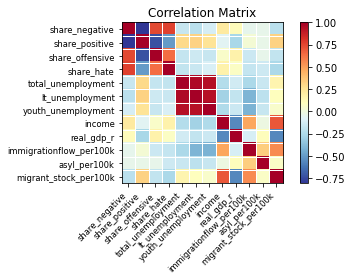

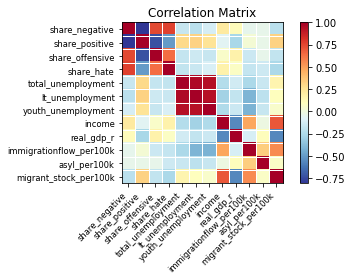

In [18]:
smg.plot_corr(corr_matrix, xnames=df_pcc_na.columns)

## 2. linear regression

In [138]:
df.columns

Index(['Unnamed: 0', 'year', 'country_code', 'valuenormal', 'valueoffensive',
       'valuehate', 'valueNegative', 'valueNeutral', 'valuePositive',
       'country', 'total_unemployment', 'real_gdp_r', 'immigration_flow',
       'asylum_applications', 'total_population', 'EU_migrant_stock',
       'NonEU_migrant_stock', 'share_offensive', 'share_negative',
       'share_positive', 'asyl_per100k', 'immigrationflow_per100k',
       'total_migrant_stock', 'migrant_stock_per100k', 'nonEU_stock_per100k',
       'iso3n', 'share_normal', 'share_hate', 'share_neutral',
       'lt_unemployment', 'income', 'youth_unemployment', 'asyl_per100k_sq',
       'asyl_x_unemployment'],
      dtype='object')

### Linear fixed effects

In [139]:
from linearmodels.panel import generate_panel_data
panel_data= generate_panel_data()

In [141]:
panel_data.data

y        x0        x1        x2        x3        x4
major   minor                                                                 
firm0   1900-12-31 -1.214290  0.160245 -0.579242  0.571671 -0.822557 -2.576228
        1901-12-31  2.998010 -2.172773 -1.795467  0.991483  0.900464  0.243234
        1902-12-31 -0.483675  0.744538 -1.525777  0.984175  1.427581 -2.027181
        1903-12-31  1.662189 -1.515617 -0.757041  0.720989 -0.161802  0.366803
        1904-12-31 -0.170545 -1.380720 -1.738797 -0.263379  0.363579 -1.003499
...                      ...       ...       ...       ...       ...       ...
firm970 1902-12-31  0.163697 -1.003405 -0.216683 -0.035853  1.694873  0.417985
        1903-12-31 -0.576166  1.789087  1.949266 -0.774195 -0.914369  1.569845
        1904-12-31 -0.876078  0.576802 -0.878326 -0.175044  1.135372  1.033827
        1905-12-31 -2.416914 -0.012307  1.237810  0.031346 -0.028605  0.007808
        1906-12-31 -1.750980  0.441772  0.580217  0.504310 -0.337466 -0.179957

[6797 rows x 6 columns]

In [143]:
data = pd.read_csv(r"https://raw.githubusercontent.com/LOST-STATS/LOST-STATS.github.io/master/Model_Estimation/Data/Fixed_Effects_in_Linear_Regression/Scorecard.csv")


In [152]:
data = df.set_index(['country_code', 'year'])

In [173]:
FE = PanelOLS(data["share_offensive"], data[["asyl_per100k", "migrant_stock_per100k" , "total_unemployment", "real_gdp_r"]],
            entity_effects = True,
              time_effects=True
              )

In [174]:
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             cluster_time=True)

### cluster_time and country

In [175]:
result

Dep. Variable:,share_offensive,R-squared:,0.0805
Estimator:,PanelOLS,R-squared (Between):,0.6384
No. Observations:,66,R-squared (Within):,0.0318
Date:,"Mon, Mar 21 2022",R-squared (Overall):,0.5711
Time:,00:34:18,Log-likelihood,282.26
Cov. Estimator:,Clustered,,
,,F-statistic:,1.0066
Entities:,11,P-value,0.4139
Avg Obs:,6.0000,Distribution:,"F(4,46)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,-0.9821


In [172]:
result

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/linearmodels/panel/results.py:87: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


Dep. Variable:,share_negative,R-squared:,0.0370
Estimator:,PanelOLS,R-squared (Between):,-0.0129
No. Observations:,66,R-squared (Within):,-0.0424
Date:,"Mon, Mar 21 2022",R-squared (Overall):,-0.0193
Time:,00:34:03,Log-likelihood,161.93
Cov. Estimator:,Clustered,,
,,F-statistic:,0.4413
Entities:,11,P-value,0.7781
Avg Obs:,6.0000,Distribution:,"F(4,46)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,-0.0429


In [169]:
result

Dep. Variable:,share_hate,R-squared:,0.0376
Estimator:,PanelOLS,R-squared (Between):,-0.0958
No. Observations:,66,R-squared (Within):,0.0380
Date:,"Mon, Mar 21 2022",R-squared (Overall):,-0.0800
Time:,00:33:42,Log-likelihood,201.74
Cov. Estimator:,Clustered,,
,,F-statistic:,0.4495
Entities:,11,P-value,0.7722
Avg Obs:,6.0000,Distribution:,"F(4,46)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,-7.0050


## cluster_time only

In [162]:
result

Dep. Variable:,share_hate,R-squared:,0.2341
Estimator:,PanelOLS,R-squared (Between):,-1.2418
No. Observations:,66,R-squared (Within):,-0.1442
Date:,"Mon, Mar 21 2022",R-squared (Overall):,-1.1121
Time:,00:22:09,Log-likelihood,163.43
Cov. Estimator:,Clustered,,
,,F-statistic:,4.2792
Entities:,11,P-value,0.0043
Avg Obs:,6.0000,Distribution:,"F(4,56)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,61.376


In [158]:
result

Dep. Variable:,share_offensive,R-squared:,0.1518
Estimator:,PanelOLS,R-squared (Between):,-0.4786
No. Observations:,66,R-squared (Within):,-0.1165
Date:,"Mon, Mar 21 2022",R-squared (Overall):,-0.4385
Time:,00:21:45,Log-likelihood,258.31
Cov. Estimator:,Clustered,,
,,F-statistic:,2.5064
Entities:,11,P-value,0.0522
Avg Obs:,6.0000,Distribution:,"F(4,56)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,65.149


In [155]:
result

Dep. Variable:,share_negative,R-squared:,0.1852
Estimator:,PanelOLS,R-squared (Between):,-0.6646
No. Observations:,66,R-squared (Within):,-0.1531
Date:,"Mon, Mar 21 2022",R-squared (Overall):,-0.5530
Time:,00:18:39,Log-likelihood,117.54
Cov. Estimator:,Clustered,,
,,F-statistic:,3.1815
Entities:,11,P-value,0.0200
Avg Obs:,6.0000,Distribution:,"F(4,56)"
Min Obs:,6.0000,,
Max Obs:,6.0000,F-statistic (robust):,13.373


### under median migrant stocked countries.


In [22]:
df.columns

Index(['Unnamed: 0', 'year', 'country_code', 'valuenormal', 'valueoffensive',
       'valuehate', 'valueNegative', 'valueNeutral', 'valuePositive',
       'country', 'total_unemployment', 'real_gdp_r', 'immigration_flow',
       'asylum_applications', 'total_population', 'EU_migrant_stock',
       'NonEU_migrant_stock', 'share_offensive', 'share_negative',
       'share_positive', 'asyl_per100k', 'immigrationflow_per100k',
       'total_migrant_stock', 'migrant_stock_per100k', 'nonEU_stock_per100k',
       'iso3n', 'share_normal', 'share_hate', 'share_neutral',
       'lt_unemployment', 'income', 'youth_unemployment'],
      dtype='object')

In [23]:
sum_ = df.groupby("country_code")["total_migrant_stock"].sum()

In [24]:
sum_.median()

14521849.0

In [25]:
sum_[sum_ <sum_.median()].index

Index(['AT', 'HU', 'NL', 'PL', 'SE'], dtype='object', name='country_code')

In [26]:
countries_below = ['AT', 'HU', 'NL', 'PL', 'SE']

In [27]:
df_sum = df[df["country_code"].isin(countries_below)]

In [124]:
sum_noneu = df.groupby("country_code")["NonEU_migrant_stock"].sum()
sum_noneu.median()

4946754.0

In [125]:
sum_noneu[sum_noneu <sum_noneu.median()].index

Index(['AT', 'HU', 'NL', 'PL', 'SE'], dtype='object', name='country_code')

In [126]:
robust_ols = sm.ols(formula="share_positive ~ asyl_per100k + migrant_stock_per100k + total_unemployment + real_gdp_r ", data=df_sum).fit(cov_type="HC1",use_t=True)

In [128]:
robust_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         share_positive   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     5.536
Date:                Sun, 20 Mar 2022   Prob (F-statistic):            0.00248
Time:                        23:21:09   Log-Likelihood:                 42.286
No. Observations:                  30   AIC:                            -74.57
Df Residuals:                      25   BIC:                            -67.57
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.3859      0.073      5.279      0.000       0.235       0.536
asyl_per100k           1.492e-05   1.65e-05      0.904      0.375   -1.91e-05    4.89e-05
migrant_stock_per100k  5.573e-06   2.15e-06      2.591      0.016    1.14e-06       1e-05
total_unemployment       -0.0179      0.009     -2.040      0.052      -0.036       0.000
real_gdp_r               -0.0083      0.013     -0.638      0.529      -0.035       0.018
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.769
Skew:                          -0.057   Prob(JB):                        0.681
Kurtosis:                       2.224   Cond. No.                     5.72e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# below median immigrant stock

In [37]:
robust_ols = sm.ols(formula="share_negative ~ asyl_per100k + migrant_stock_per100k +total_unemployment+ real_gdp_r +  immigration_flow ", data=df_sum).fit(cov_type="HC1",use_t=True)

In [38]:
robust_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         share_negative   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     4.638
Date:                Mon, 21 Mar 2022   Prob (F-statistic):            0.00420
Time:                        15:15:14   Log-Likelihood:                 48.715
No. Observations:                  30   AIC:                            -85.43
Df Residuals:                      24   BIC:                            -77.02
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0415      0.058     -0.718      0.480      -0.161       0.078
asyl_per100k           3.826e-06   1.57e-05      0.243      0.810   -2.86e-05    3.63e-05
migrant_stock_per100k -1.796e-06    2.1e-06     -0.857      0.400   -6.12e-06    2.53e-06
total_unemployment        0.0087      0.007      1.218      0.235      -0.006       0.024
real_gdp_r                0.0046      0.008      0.597      0.556      -0.011       0.021
immigration_flow       4.112e-07   1.54e-07      2.676      0.013     9.4e-08    7.28e-07
==============================================================================
Omnibus:                        5.334   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.010
Skew:                           0.880   Prob(JB):                        0.135
Kurtosis:                       3.336   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
robust_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        share_offensive   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.813
Date:                Mon, 21 Mar 2022   Prob (F-statistic):             0.0389
Time:                        15:15:04   Log-Likelihood:                 117.46
No. Observations:                  30   AIC:                            -222.9
Df Residuals:                      24   BIC:                            -214.5
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0119      0.006      1.861      0.075      -0.001       0.025
asyl_per100k           5.023e-07   1.96e-06      0.256      0.800   -3.55e-06    4.55e-06
migrant_stock_per100k -4.547e-07   1.94e-07     -2.347      0.028   -8.55e-07   -5.48e-08
total_unemployment     6.661e-05      0.001      0.127      0.900      -0.001       0.001
real_gdp_r               -0.0003      0.001     -0.399      0.694      -0.002       0.001
immigration_flow        1.36e-08   1.93e-08      0.706      0.487   -2.62e-08    5.33e-08
==============================================================================
Omnibus:                        9.868   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.173
Skew:                           0.950   Prob(JB):                       0.0102
Kurtosis:                       4.931   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
robust_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             share_hate   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     6.639
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           0.000518
Time:                        15:14:38   Log-Likelihood:                 80.734
No. Observations:                  30   AIC:                            -149.5
Df Residuals:                      24   BIC:                            -141.1
Df Model:                           5                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0641      0.027      2.333      0.028       0.007       0.121
asyl_per100k          -6.028e-06   7.45e-06     -0.809      0.427   -2.14e-05    9.35e-06
migrant_stock_per100k -2.985e-06   5.93e-07     -5.031      0.000   -4.21e-06   -1.76e-06
total_unemployment        0.0027      0.004      0.676      0.505      -0.006       0.011
real_gdp_r               -0.0032      0.003     -1.233      0.229      -0.008       0.002
immigration_flow      -7.911e-08   6.13e-08     -1.291      0.209   -2.06e-07    4.73e-08
==============================================================================
Omnibus:                        8.288   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.683
Skew:                           0.931   Prob(JB):                       0.0354
Kurtosis:                       4.372   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
robust_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             share_hate   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     4.716
Date:                Sun, 20 Mar 2022   Prob (F-statistic):            0.00566
Time:                        23:09:25   Log-Likelihood:                 79.909
No. Observations:                  30   AIC:                            -149.8
Df Residuals:                      25   BIC:                            -142.8
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0512      0.024      2.164      0.040       0.002       0.100
asyl_per100k           -2.62e-06   7.31e-06     -0.358      0.723   -1.77e-05    1.24e-05
migrant_stock_per100k -2.787e-06   6.86e-07     -4.063      0.000    -4.2e-06   -1.37e-06
total_unemployment        0.0024      0.004      0.637      0.530      -0.005       0.010
real_gdp_r               -0.0028      0.003     -1.065      0.297      -0.008       0.003
==============================================================================
Omnibus:                        5.124   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.540
Skew:                           0.787   Prob(JB):                        0.170
Kurtosis:                       3.597   Cond. No.                     5.72e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
robust_ols.summary() # share_offensive ~ asyl_per100k + migrant_stock_per100k + total_unemployment + real_gdp_r 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        share_offensive   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3.881
Date:                Sun, 20 Mar 2022   Prob (F-statistic):             0.0138
Time:                        23:03:41   Log-Likelihood:                 117.18
No. Observations:                  30   AIC:                            -224.4
Df Residuals:                      25   BIC:                            -217.3
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0141      0.004      3.294      0.003       0.005       0.023
asyl_per100k          -8.334e-08    1.5e-06     -0.056      0.956   -3.17e-06       3e-06
migrant_stock_per100k -4.887e-07   1.68e-07     -2.909      0.008   -8.35e-07   -1.43e-07
total_unemployment        0.0001      0.001      0.237      0.815      -0.001       0.001
real_gdp_r               -0.0004      0.001     -0.506      0.617      -0.002       0.001
==============================================================================
Omnibus:                        8.082   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.711
Skew:                           0.846   Prob(JB):                       0.0349
Kurtosis:                       4.584   Cond. No.                     5.72e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
robust_ols.summary()  # share_negative ~ asyl_per100k + migrant_stock_per100k + total_unemployment + real_gdp_r

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         share_negative   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.919
Date:                Sun, 20 Mar 2022   Prob (F-statistic):              0.139
Time:                        22:59:42   Log-Likelihood:                 46.224
No. Observations:                  30   AIC:                            -82.45
Df Residuals:                      25   BIC:                            -75.44
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0256      0.083      0.307      0.761      -0.146       0.197
asyl_per100k          -1.389e-05   1.64e-05     -0.849      0.404   -4.76e-05    1.98e-05
migrant_stock_per100k -2.823e-06   2.69e-06     -1.051      0.303   -8.35e-06    2.71e-06
total_unemployment        0.0103      0.008      1.258      0.220      -0.007       0.027
real_gdp_r                0.0029      0.011      0.262      0.796      -0.020       0.026
==============================================================================
Omnibus:                        2.656   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.242
Skew:                           0.560   Prob(JB):                        0.326
Kurtosis:                       2.267   Cond. No.                     5.72e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### pooled linear regression

In [130]:
df.columns

Index(['Unnamed: 0', 'year', 'country_code', 'valuenormal', 'valueoffensive',
       'valuehate', 'valueNegative', 'valueNeutral', 'valuePositive',
       'country', 'total_unemployment', 'real_gdp_r', 'immigration_flow',
       'asylum_applications', 'total_population', 'EU_migrant_stock',
       'NonEU_migrant_stock', 'share_offensive', 'share_negative',
       'share_positive', 'asyl_per100k', 'immigrationflow_per100k',
       'total_migrant_stock', 'migrant_stock_per100k', 'nonEU_stock_per100k',
       'iso3n', 'share_normal', 'share_hate', 'share_neutral',
       'lt_unemployment', 'income', 'youth_unemployment', 'asyl_per100k_sq',
       'asyl_x_unemployment'],
      dtype='object')

In [ ]:
* Set control variables
global controls="migrant_stock_per100k total_unemployment real_gdp_r"
* Table 2
reg share_negative asyl_per100k $controls, cluster(iso3n)
                                                   
outreg2 using table2.xls, label replace
reg share_offensive asyl_per100k $controls, cluster(iso3n)
outreg2 using table2.xls, label append
*reg share_negative asyl_per100k $controls asyl_x_unemployment, cluster(iso3n) ---> THIS GIVES A WEAKLY SIGNIF COEFFICIENT BUT IT DOES NOT MAKE SENSE, HENCE EXCLUDE FOR THE MOMENT
*outreg2 using table2.xls, label replace
*reg share_offensive asyl_per100k $controls asyl_x_unemployment, cluster(iso3n)
*outreg2 using table2.xls, label append
reg share_negative immigrationflow_per100k $controls, cluster(iso3n)
outreg2 using table2.xls, label append
reg share_offensive immigrationflow_per100k $controls, cluster(iso3n)
outreg2 using table2.xls, label append

In [33]:
import numpy as np
import statsmodels.formula.api as sm

In [38]:
df.iso3n.value_counts()

40     8
756    8
276    8
724    8
250    8
826    8
348    8
380    8
528    8
616    8
752    8
Name: iso3n, dtype: int64

In [1]:
df

NameError: name 'df' is not defined

In [69]:
df_year= df.groupby(["iso3n"]).mean()

In [70]:
df_year

,Unnamed: 0,year,valuenormal,valueoffensive,valuehate,valueNegative,valueNeutral,valuePositive,total_unemployment,real_gdp_r,...,migrant_stock_per100k,nonEU_stock_per100k,share_normal,share_hate,share_neutral,lt_unemployment,income,youth_unemployment,asyl_per100k_sq,asyl_x_unemployment
iso3n,,,,,,,,,,,,,,,,,,,,,
40,38.5,2016.5,669.875,5.500,18.625,43.250,406.875,243.875,5.7750,0.41250,...,14495.762833,7261.781983,0.964516,0.027314,0.591516,1.537500,22083.333333,10.7375,232054.093316,2277.059086
250,42.5,2016.5,2969.500,27.000,115.000,257.000,1815.750,1038.750,9.4750,0.23750,...,6932.133700,4630.286950,0.958966,0.033300,0.587661,4.100000,19100.000000,23.9875,19707.516564,1263.706020
276,40.5,2016.5,2743.000,39.750,123.250,323.750,1813.625,768.625,4.1250,0.82500,...,10573.396767,5901.496750,0.947293,0.039428,0.636056,1.712500,20933.333333,7.0000,179831.280399,1428.131761
348,44.5,2016.5,367.000,4.250,22.125,22.250,238.375,132.750,5.4875,2.68750,...,1586.728767,774.902362,0.933291,0.055758,0.610901,2.437500,6150.000000,15.0125,489326.035127,2607.034533
380,45.5,2016.5,3013.625,40.500,142.750,275.375,1919.250,1002.250,11.1875,-0.70000,...,8301.931900,5809.408717,0.944556,0.043245,0.605384,6.500000,17083.333333,35.7875,18019.278954,1382.095595
528,46.5,2016.5,1697.000,17.125,72.250,177.875,1098.625,509.875,5.4375,1.12500,...,5142.444433,2333.447817,0.954129,0.036797,0.627878,2.000000,18883.333333,9.9875,19720.589570,740.455213
616,47.5,2016.5,650.875,11.875,30.875,90.875,469.375,133.375,6.0375,3.02500,...,479.386073,403.062242,0.934997,0.047625,0.675505,2.175000,6650.000000,17.1125,444.833575,137.234623
724,41.5,2016.5,2280.875,29.125,105.250,214.750,1426.125,774.375,19.3000,0.42500,...,9789.124367,5602.119550,0.947595,0.041148,0.595867,8.925000,14016.666667,43.1375,11483.585134,1184.397597
752,48.5,2016.5,739.750,14.000,42.125,122.625,485.000,188.250,7.3375,1.77500,...,7901.631267,4815.015950,0.943077,0.043484,0.625618,1.300000,22050.000000,20.6250,517857.727354,4004.921803


In [75]:
df.columns

Index(['Unnamed: 0', 'year', 'country_code', 'valuenormal', 'valueoffensive',
       'valuehate', 'valueNegative', 'valueNeutral', 'valuePositive',
       'country', 'total_unemployment', 'real_gdp_r', 'immigration_flow',
       'asylum_applications', 'total_population', 'EU_migrant_stock',
       'NonEU_migrant_stock', 'share_offensive', 'share_negative',
       'share_positive', 'asyl_per100k', 'immigrationflow_per100k',
       'total_migrant_stock', 'migrant_stock_per100k', 'nonEU_stock_per100k',
       'iso3n', 'share_normal', 'share_hate', 'share_neutral',
       'lt_unemployment', 'income', 'youth_unemployment', 'asyl_per100k_sq',
       'asyl_x_unemployment'],
      dtype='object')

In [76]:
robust_ols = sm.ols(formula="share_negative ~ migrant_stock_per100k + total_unemployment + real_gdp_r + immigrationflow_per100k ", data=df).fit(cov_type="HC1",use_t=True)

In [77]:
robust_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         share_negative   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.820
Date:                Sun, 20 Mar 2022   Prob (F-statistic):              0.136
Time:                        22:20:16   Log-Likelihood:                 94.904
No. Observations:                  66   AIC:                            -179.8
Df Residuals:                      61   BIC:                            -168.9
Df Model:                           4                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1082      0.030      3.624      0.001       0.049       0.168
migrant_stock_per100k   -2.759e-06   1.43e-06     -1.932      0.058   -5.61e-06    9.68e-08
total_unemployment         -0.0021      0.002     -1.316      0.193      -0.005       0.001
real_gdp_r                 -0.0029      0.005     -0.534      0.595      -0.014       0.008
immigrationflow_per100k  1.228e-05   2.13e-05      0.576      0.567   -3.03e-05    5.49e-05
==============================================================================
Omnibus:                        9.336   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.979
Skew:                           0.858   Prob(JB):                       0.0112
Kurtosis:                       3.563   Cond. No.                     5.03e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
robust_ols = sm.ols(formula="share_offensive ~ migrant_stock_per100k + total_unemployment + real_gdp_r + immigrationflow_per100k ", data=df).fit(cov_type="HC1",use_t=True)

In [82]:
robust_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        share_offensive   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     5.452
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           0.000807
Time:                        22:28:50   Log-Likelihood:                 253.24
No. Observations:                  66   AIC:                            -496.5
Df Residuals:                      61   BIC:                            -485.5
Df Model:                           4                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0150      0.003      4.721      0.000       0.009       0.021
migrant_stock_per100k   -2.027e-07    1.1e-07     -1.844      0.070   -4.22e-07    1.71e-08
total_unemployment         -0.0002      0.000     -0.876      0.385      -0.001       0.000
real_gdp_r                  0.0001      0.001      0.241      0.811      -0.001       0.001
immigrationflow_per100k -1.521e-06   1.76e-06     -0.863      0.392   -5.05e-06       2e-06
==============================================================================
Omnibus:                        6.268   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.992
Skew:                           0.738   Prob(JB):                       0.0500
Kurtosis:                       3.055   Cond. No.                     5.03e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
robust_ols = sm.ols(formula="share_hate ~ migrant_stock_per100k + total_unemployment + real_gdp_r + immigrationflow_per100k ", data=df).fit(cov_type="HC1",use_t=True)

In [85]:
robust_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             share_hate   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     6.794
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           0.000137
Time:                        22:35:37   Log-Likelihood:                 152.37
No. Observations:                  66   AIC:                            -294.7
Df Residuals:                      61   BIC:                            -283.8
Df Model:                           4                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0692      0.012      5.953      0.000       0.046       0.092
migrant_stock_per100k   -1.425e-06   4.53e-07     -3.148      0.003   -2.33e-06    -5.2e-07
total_unemployment         -0.0010      0.001     -1.627      0.109      -0.002       0.000
real_gdp_r                 -0.0020      0.002     -1.066      0.291      -0.006       0.002
immigrationflow_per100k -3.946e-06   6.96e-06     -0.567      0.573   -1.79e-05    9.97e-06
==============================================================================
Omnibus:                       35.111   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.376
Skew:                           1.814   Prob(JB):                     7.07e-17
Kurtosis:                       6.726   Cond. No.                     5.03e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 5.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
robust_ols = sm.ols(formula="share_hate ~ asyl_per100k + migrant_stock_per100k + total_unemployment + real_gdp_r ", data=df).fit(cov_type="HC1",use_t=True)

In [80]:
robust_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             share_hate   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     6.688
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           0.000157
Time:                        22:20:57   Log-Likelihood:                 153.05
No. Observations:                  66   AIC:                            -296.1
Df Residuals:                      61   BIC:                            -285.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0689      0.011      6.538      0.000       0.048       0.090
asyl_per100k          -1.133e-05   6.51e-06     -1.740      0.087   -2.43e-05    1.69e-06
migrant_stock_per100k -1.573e-06   3.12e-07     -5.034      0.000    -2.2e-06   -9.48e-07
total_unemployment       -0.0010      0.001     -1.736      0.088      -0.002       0.000
real_gdp_r               -0.0019      0.002     -1.027      0.309      -0.006       0.002
==============================================================================
Omnibus:                       32.171   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.182
Skew:                           1.691   Prob(JB):                     1.91e-14
Kurtosis:                       6.397   Cond. No.                     4.55e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
robust_ols = sm.ols(formula="share_negative ~ asyl_per100k + migrant_stock_per100k + total_unemployment + real_gdp_r ", data=df).fit(cov_type="HC1",use_t=True)

In [72]:
robust_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         share_negative   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.693
Date:                Sun, 20 Mar 2022   Prob (F-statistic):              0.163
Time:                        22:14:41   Log-Likelihood:                 94.972
No. Observations:                  66   AIC:                            -179.9
Df Residuals:                      61   BIC:                            -169.0
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1176      0.027      4.318      0.000       0.063       0.172
asyl_per100k          -1.355e-05   1.67e-05     -0.812      0.420   -4.69e-05    1.98e-05
migrant_stock_per100k -2.032e-06   9.18e-07     -2.215      0.031   -3.87e-06   -1.97e-07
total_unemployment       -0.0025      0.001     -1.639      0.106      -0.005       0.001
real_gdp_r               -0.0018      0.005     -0.337      0.737      -0.013       0.009
==============================================================================
Omnibus:                        8.569   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.081
Skew:                           0.819   Prob(JB):                       0.0176
Kurtosis:                       3.505   Cond. No.                     4.55e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
robust_ols = sm.ols(formula="share_offensive ~ asyl_per100k + migrant_stock_per100k + total_unemployment + real_gdp_r ", data=df).fit(cov_type="HC1",use_t=True)

In [74]:
robust_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        share_offensive   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     5.806
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           0.000502
Time:                        22:15:23   Log-Likelihood:                 253.10
No. Observations:                  66   AIC:                            -496.2
Df Residuals:                      61   BIC:                            -485.3
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0143      0.003      4.734      0.000       0.008       0.020
asyl_per100k          -8.085e-07   1.66e-06     -0.486      0.629   -4.14e-06    2.52e-06
migrant_stock_per100k -2.791e-07   7.07e-08     -3.947      0.000   -4.21e-07   -1.38e-07
total_unemployment       -0.0002      0.000     -0.765      0.447      -0.001       0.000
real_gdp_r             7.467e-05      0.001      0.129      0.898      -0.001       0.001
==============================================================================
Omnibus:                        5.741   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.455
Skew:                           0.704   Prob(JB):                       0.0654
Kurtosis:                       3.016   Cond. No.                     4.55e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
robust_ols = sm.ols(formula="share_negative ~ asyl_per100k + migrant_stock_per100k + total_unemployment + real_gdp_r ", data=df).fit(cov_type="HC1",use_t=True)

# Preprocessing 02

In [6]:
df["share_offensive"]= df["valueoffensive"]/(df["valuenormal"]+df["valueoffensive"]+df["valuehate"])

In [8]:
df["share_normal"]= df["valuenormal"]/(df["valuenormal"]+df["valueoffensive"]+df["valuehate"])

In [9]:
df["share_hate"]= df["valuehate"]/(df["valuenormal"]+df["valueoffensive"]+df["valuehate"])

In [11]:
df["share_negative"]= df["valueNegative"]/(df["valueNegative"]+df["valuePositive"]+df["valueNeutral"])

In [12]:
df["share_neutral"]= df["valueNeutral"]/(df["valueNegative"]+df["valuePositive"]+df["valueNeutral"])
df["share_positive"]= df["valuePositive"]/(df["valueNegative"]+df["valuePositive"]+df["valueNeutral"])

In [15]:
df.to_csv("../data/correlation_data/working_dataset.csv")

# Preprocessing data for correlation analysis

In [31]:
df = pd.read_csv('../data/input/df_50_tm_sentiment_hsd_entities.csv', low_memory=False)

In [32]:
len(df)

397423

In [33]:
df.dropna(subset=['created_at'], inplace=True)

In [34]:
len(df)

397340

In [37]:
df['Year'] = [x for x in df['created_at'].str.slice(stop=4)]  # 200k

In [41]:
df = df[df["Year"].isin([str(x) for x in years])]

In [43]:
len(df)

397339

In [7]:
country_dict = {"AT":"Austria", "DE":"Germany", "GB":"United Kingdom", "ES":"Spain", "PL":"Poland", 
               "FR":"France", "SE":"Sweden", "HU":"Hungary", "CH":"Switzerland", "NL":"Netherlands", "IT":"Italy"}

In [13]:
country2code = {v:k for k,v in country_dict.items()}

In [8]:
countries_names = list(country_dict.values())

In [9]:
data = pd.read_csv("../data/corr/working_dataset.csv")

In [11]:
data = data[data["country"].isin(countries_names)]

In [15]:
country2code

{'Austria': 'AT',
 'Germany': 'DE',
 'United Kingdom': 'GB',
 'Spain': 'ES',
 'Poland': 'PL',
 'France': 'FR',
 'Sweden': 'SE',
 'Hungary': 'HU',
 'Switzerland': 'CH',
 'Netherlands': 'NL',
 'Italy': 'IT'}

In [20]:
data["country_code"] = data["country"].replace(country2code)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_54481/572499154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["country_code"] = data["country"].replace(country2code)


In [22]:
data.columns

Index(['year', 'country', 'valuenormal', 'valueoffensive', 'valueNegative',
       'valueNeutral', 'valuePositive', 'total_unemployment', 'real_gdp_r',
       'immigration_flow', 'asylum_applications', 'total_population',
       'EU_migrant_stock', 'NonEU_migrant_stock', 'share_offensive',
       'share_negative', 'share_positive', 'asyl_per100k',
       'immigrationflow_per100k', 'total_migrant_stock',
       'migrant_stock_per100k', 'nonEU_stock_per100k', 'iso3n',
       'country_code'],
      dtype='object')

In [47]:
year_ls =[]
countries_ls =[]
valuenormal=[]
valueoffensive=[]
valuehate =[]
valueNegative =[]
valuePositive=[]
valueNeutral =[]
for k, group in df.groupby(["Year", "country_code"]):
    year_, country_ = k
    sentiments_df = group["pred_sentiment"].value_counts()
    neg = sentiments_df.loc[0]
    neu = sentiments_df.loc[1]
    pos = sentiments_df.loc[2]
    
    hate_df = group["hatespeech_pred"].value_counts()
    normal = hate_df.loc[0]
    offn = hate_df.loc[1]
    hate = hate_df.loc[2]
    
    year_ls.append(year_)
    countries_ls.append(country_)
    valueNegative.append(neg)
    valuePositive.append(pos)
    valueNeutral.append(neu)
    
    valuenormal.append(normal)
    valueoffensive.append(offn)
    valuehate.append(hate)


In [49]:
df_stats = pd.DataFrame.from_dict({"year":year_ls, "country_code":countries_ls, 
                                  "valuenormal":valuenormal, "valueoffensive":valueoffensive, "valuehate":valuehate, 
                                  "valueNegative":valueNegative, "valueNeutral":valueNeutral, "valuePositive":valuePositive})

In [54]:
df_stats["year"] = [int(x) for x in df_stats.year]

In [56]:
df_merge = pd.merge(df_stats, data, on=["year", "country_code"])

In [58]:
df_merge.columns

Index(['year', 'country_code', 'valuenormal_x', 'valueoffensive_x',
       'valuehate', 'valueNegative_x', 'valueNeutral_x', 'valuePositive_x',
       'country', 'valuenormal_y', 'valueoffensive_y', 'valueNegative_y',
       'valueNeutral_y', 'valuePositive_y', 'total_unemployment', 'real_gdp_r',
       'immigration_flow', 'asylum_applications', 'total_population',
       'EU_migrant_stock', 'NonEU_migrant_stock', 'share_offensive',
       'share_negative', 'share_positive', 'asyl_per100k',
       'immigrationflow_per100k', 'total_migrant_stock',
       'migrant_stock_per100k', 'nonEU_stock_per100k', 'iso3n'],
      dtype='object')

In [59]:
df_merge=df_merge[['year', 'country_code', 'valuenormal_x', 'valueoffensive_x',
       'valuehate', 'valueNegative_x', 'valueNeutral_x', 'valuePositive_x',
       'country', 'total_unemployment', 'real_gdp_r',
       'immigration_flow', 'asylum_applications', 'total_population',
       'EU_migrant_stock', 'NonEU_migrant_stock', 'share_offensive',
       'share_negative', 'share_positive', 'asyl_per100k',
       'immigrationflow_per100k', 'total_migrant_stock',
       'migrant_stock_per100k', 'nonEU_stock_per100k', 'iso3n']]

In [61]:
df_merge.to_csv("../data/correlation_data/working_dataset.csv", index=False)

In [24]:
df.columns

Index(['id', 'author_id', 'conversation_id', 'created_at', 'lang', 'long',
       'lat', 'hashtags', 'user_mentions', 'reply_count', 'like_count',
       'retweet_count', 'full_name', 'name', 'country', 'geo', 'country_code',
       'preprocessed_text', 'non_empty_data_tm', 'text_processed',
       'pred_sentiment', 'hatespeech_pred', 'prim_topic', 'prim_score',
       'topic_immig_max_score', 'topic_immg_max', 'entity_0', 'entity_1',
       'entity_2', 'entity_3', 'entity_4', 'entity_5', 'entity_6', 'entity_7',
       'entity_8', 'entity_9', 'entity_10', 'entity_11', 'entity_12',
       'entity_13', 'entity_14', 'entity_15', 'entity_16', 'entity_17',
       'entity_18', 'entity_19', 'entity_20', 'entity_21', 'entity_22',
       'entity_23', 'entity_24', 'entity_25', 'entity_26', 'entity_27',
       'entity_28', 'entity_29', 'author_id_gen'],
      dtype='object')

In [18]:
df.created_at

0         2017-03-10T07:23:11.000Z
1         2019-08-19T15:41:09.000Z
2         2013-11-28T15:07:20.000Z
3         2019-03-19T12:00:12.000Z
4         2014-05-22T14:48:04.000Z
                    ...           
397418    2021-04-06T14:39:57.000Z
397419    2013-03-20T23:18:26.000Z
397420    2020-02-05T17:48:01.000Z
397421    2013-10-05T08:22:31.000Z
397422    2014-06-28T06:56:23.000Z
Name: created_at, Length: 397423, dtype: object

In [20]:
df['Year'] = df.created_at.str[:4]  # 200k

In [16]:
df.columns

Index(['id', 'author_id', 'conversation_id', 'created_at', 'lang', 'long',
       'lat', 'hashtags', 'user_mentions', 'reply_count', 'like_count',
       'retweet_count', 'full_name', 'name', 'country', 'geo', 'country_code',
       'preprocessed_text', 'non_empty_data_tm', 'text_processed',
       'pred_sentiment', 'hatespeech_pred', 'prim_topic', 'prim_score',
       'topic_immig_max_score', 'topic_immg_max', 'entity_0', 'entity_1',
       'entity_2', 'entity_3', 'entity_4', 'entity_5', 'entity_6', 'entity_7',
       'entity_8', 'entity_9', 'entity_10', 'entity_11', 'entity_12',
       'entity_13', 'entity_14', 'entity_15', 'entity_16', 'entity_17',
       'entity_18', 'entity_19', 'entity_20', 'entity_21', 'entity_22',
       'entity_23', 'entity_24', 'entity_25', 'entity_26', 'entity_27',
       'entity_28', 'entity_29', 'author_id_gen'],
      dtype='object')